# Titanic: Data Analysis

#### `Code by @Om`

## Understanding the data

In [1]:
# Libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


%matplotlib inline

## Load datasets & Get basic info

In [2]:
# Load datasets & Analyse
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print("Training Set shape: ", df_train.shape)
print("Test Set shape: ", df_test.shape)

print("\nNumber of training examples: ", df_train.shape[0])
print("Number of testing examples: ", df_test.shape[0])

print("\nNumber of features-Training Set: ", df_train.shape[1])
print("Number of features-Testing Set: ", df_test.shape[1])

print("\n",df_train.columns)
print("\n",df_test.columns)

Training Set shape:  (891, 12)
Test Set shape:  (418, 11)

Number of training examples:  891
Number of testing examples:  418

Number of features-Training Set:  12
Number of features-Testing Set:  11

 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
# Obtain a combined dataframe 
df_all = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)
df_all.shape

(1309, 12)

## 1. Data Wrangling & Exploratory Data Analysis <br>

**1. `passenger-id:`** A unique passenger-id thus has no effect on survival

**2. `Survived:`** Target variable whether person survived or not<br>
    **1 - Survived**<br>
    **0 - Not Survived**

**3. `P-Class:`** Ticket Class `(1 (First) ||  2(Second) || 3(Third))`

**4. `Name, Sex, & Age`** are understood

**7. `SibSp: `** is the total number of the passengers' siblings and spouse
**8. `Parch: `** is the total number of the passengers' parents and children

**9. `Ticket: `** Ticket number of the passenger

**10. `Fare: `** Ticket Fare

**11. `Cabin: `** Cabin Number

**12. `Embarked: `** Ports where passenger came on-board<br>
    **C = Cherbourg**<br>
    **Q = Queenstown**<br>
    **S = Southampton**

In [4]:
# Some data from training set
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# General Info about the training set

print(df_train.info())
df_train.sample(3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


In [6]:
print(df_test.info())
df_test.sample(3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q


## 1.1 Dealing with missing values

There are some missing values in the data:

`Age`,`Cabin` & `Embarked`: **Training Dataset**

`Age`, `Cabin` & `Fare`: **Testing Dataset**

The missing values must be managed on the concatenated dataset

### 1.1.1 Dealing with missing values: Age

#### Method used: `df.fillna( )` [Fill with the median values]<br>

The `Pclass` feature can be used to handle the missing values from `Age` feature as it has a good correlation with <br>`Age: 0.408106` & `Survived: 0.338481`

In [7]:
# Correlation between Age & other features

df_all.corr().abs()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,0.150917,0.028814,0.408106,0.243699,0.077221
Fare,0.178740,1.000000,0.221539,0.031428,0.558629,0.160238,0.257307
Parch,0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,0.038354,0.055224,0.005007
Pclass,0.408106,0.558629,0.018322,0.038354,1.000000,0.060832,0.338481
SibSp,0.243699,0.160238,0.373587,0.055224,0.060832,1.000000,0.035322
Survived,0.077221,0.257307,0.081629,0.005007,0.338481,0.035322,1.000000


In order to be more accurate, `Sex` feature is used as the second level of `groupby` while filling the missing `Age` values. As seen from below, `Pclass` and `Sex` groups have distinct `median` Age values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in `Age` feature.

In [8]:
# GroupBy Sex & Pclass

age_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()
age_pclass_sex[['Age']]

Age
Sex    Pclass      
female 1       36.0
       2       28.0
       3       22.0
male   1       42.0
       2       29.5
       3       25.0

In [9]:
# Fill the values in the dataframe
df_all["Age"] = df_all.groupby(['Sex', 'Pclass'])["Age"].apply(lambda x: x.fillna(x.median()))
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### All the NaN values got filled with this technique

### 1.1.2 Dealing with missing values: Embarked

In [10]:
# Find the missing values in Embarked
df_all[df_all["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [11]:
# Upper Class Females data only

# df = df_all[df_all["Sex"]=='female']
# df = df[df["Pclass"]==1]

In [12]:
# According to some google search: Southampton was where she got on-board
# Store the values in the dataframe

df_all["Embarked"] = df_all["Embarked"].fillna('S')

In [13]:
df_all[df_all["Cabin"]=="B28"]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,S,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,S,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


### 1.1.3 Dealing with missing values: Fare

`Fare` depends on the family size(`SibSp` & `Parch`) & also the `Pclass`

As only 1 person is there who doesn't have a `Fare` value assigned thus find accordingly to his values.

In [14]:
df_all[df_all["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [15]:
median_fare = df_all.groupby(['Pclass', 'Parch','SibSp'])["Fare"].median()[3][0][0]
median_fare

# Fill the value in the dataframe 
df_all["Fare"] = df_all["Fare"].fillna(median_fare)

#### All the missing values are being removed except for `Cabin`

## 1.2.1 Cabin: Missing Values

#### There are many missing values in the `Cabin` feature & thus a detailed analysis is required. 

**`Cabin`** cannot be ignored while developing the model because it maybe a great information for the model. Many values are missing from the `Cabin` feature & thus we need to figure out something to replace the values.<br> It turns out to be the first letter of the **`Cabin`** values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

<br>

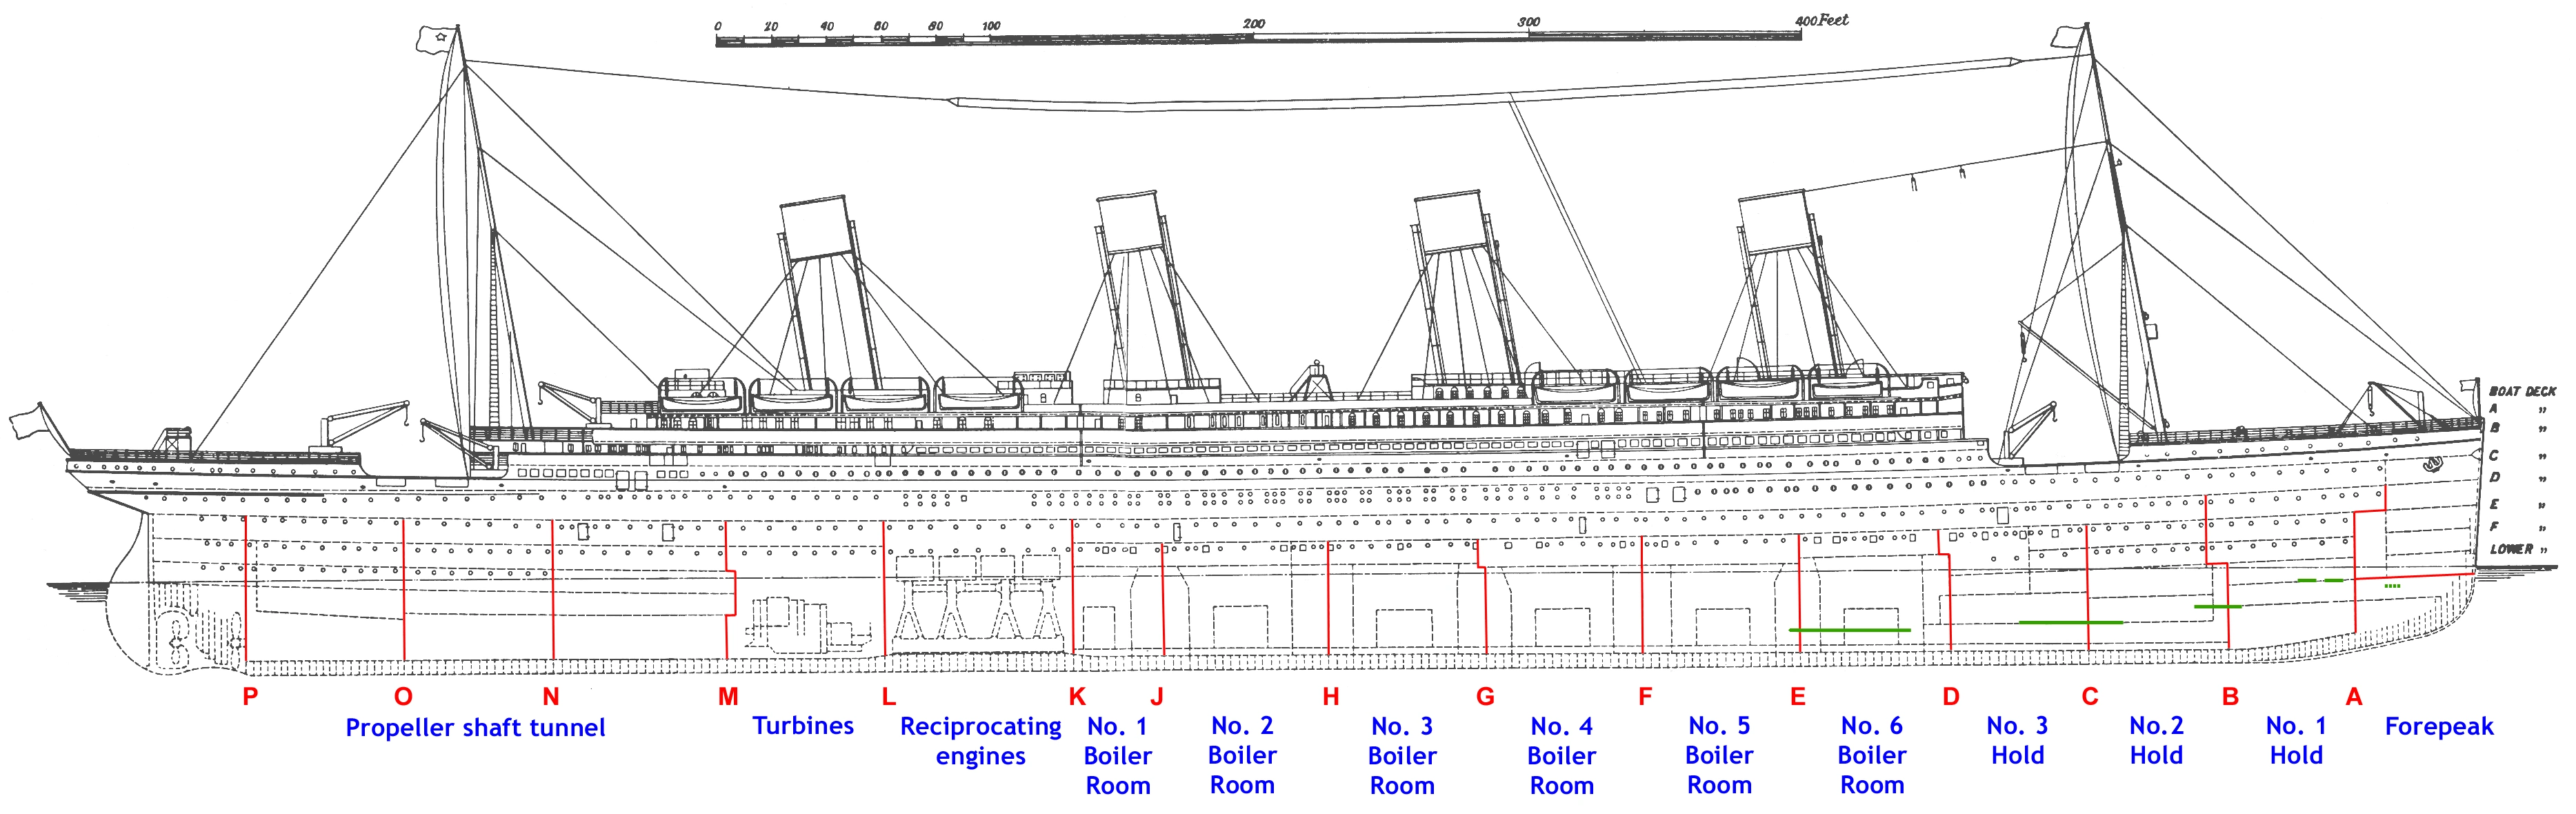

- `A, B and C` decks were only for `1st class passengers`<br>
- `D and E` decks were for `all classes`<br>
- `F and G` decks were for both `2nd and 3rd class passengers`<br>
- From going `A to G`, `distance` to the `staircase increases` which might be a factor of survival

#### Create a new Deck column

In [16]:
# Add the Deck column in DataFrame
df_all["Deck"] = df_all["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else "M")

df_all_decks = df_all.groupby(["Deck", 'Pclass']).count().drop(columns=['Age', 'Cabin', 'Embarked', 'Fare','Parch', 'PassengerId','Sex', 'SibSp', 'Survived', 'Ticket'])
df_all_decks.rename(columns={"Name": "Count"}, inplace=True)
df_all_decks

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

<iframe src="https://www.kaggle.com/embed/gunesevitan/titanic-advanced-feature-engineering-tutorial?cellId=24&cellIds=24&kernelSessionId=27280410" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Titanic - Advanced Feature Engineering Tutorial"></iframe>

**100%** of **A, B and C** decks are `1st class passengers`<br>

**Deck D** has **87%** `1st class` and **13%** `2nd class passengers`<br>

**Deck E** has **83%** `1st class`, **10%** `2nd class` and **7%** `3rd class passengers`<br>

**Deck F** has **62%** `2nd class` and **38%** `3rd class passengers`<br>

**100%** of **G deck** are `3rd class passengers`<br>

There is one person on the boat **deck in T** cabin and he is a `1st class passenger`. T cabin passenger has the closest resemblance to A deck passengers so he is grouped with A deck<br>
Passengers labeled as `M` are the missing values in Cabin feature. `I don't think it is possible to find those passengers'` real Deck so I decided to use `M` like a deck<br>

In [17]:
# Replace T with A as T has only 1 first class passenger
t_index = df_all[df_all["Deck"] == 'T'].index
df_all.loc[t_index, "Deck"] = 'A'

In [18]:
pd.DataFrame(df_all["Deck"].value_counts()).transpose()

,M,C,B,D,E,A,F,G
Deck,1014,94,65,46,41,23,21,5


In [19]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


#### Drop the `Cabin` feature; `Deck` is used instead.

In [20]:
df_all.drop(['Cabin'], axis=1 ,inplace=True)
df_all.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


## Train & Test dataset split  

#### Use custom split due to `Survived` feature

In [21]:
# Train-Test split (Predifined Function)
# df_split_train, df_split_test = train_test_split(df_all, test_size=0.2, random_state=42)

In [22]:
df_train, df_test = df_all.loc[:890], df_all.loc[891:].drop(['Survived'], axis=1)

### Datasets Split

In [23]:
print("Training Dataset size: ",df_train.shape)
print("Test Dataset size: ",df_test.shape)

Training Dataset size:  (891, 12)
Test Dataset size:  (418, 11)


### Get the missing values in the datasets

In [24]:
# Function to get missing values count in dataframe
def get_null_count(df):
    null_counts = pd.DataFrame()
    feat = []
    counts = []
    for i in df.columns.to_list():
        feat.append(i)
        counts.append(df[i].isnull().sum())
    null_counts["Feature"] = feat
    null_counts["Count"] = counts
    return null_counts.transpose()

In [25]:
get_null_count(df_train)

,0,1,2,3,4,5,6,7,8,9,10,11
Feature,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
Count,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
get_null_count(df_test)

,0,1,2,3,4,5,6,7,8,9,10
Feature,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Deck
Count,0,0,0,0,0,0,0,0,0,0,0


## Target Distribution: (Survived & Non-Survived)

In [27]:
# Survived count training data
nsurvived = df_train['Survived'].value_counts()[0]
survived = df_train['Survived'].value_counts()[1]

print("Survived Percentage: ","{:.2f}%".format(survived/df_train.shape[0]*100))
print("Non-Survived Percentage: ","{:.2f}%".format(nsurvived/df_train.shape[0]*100))

Survived Percentage:  38.38%
Non-Survived Percentage:  61.62%


D:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


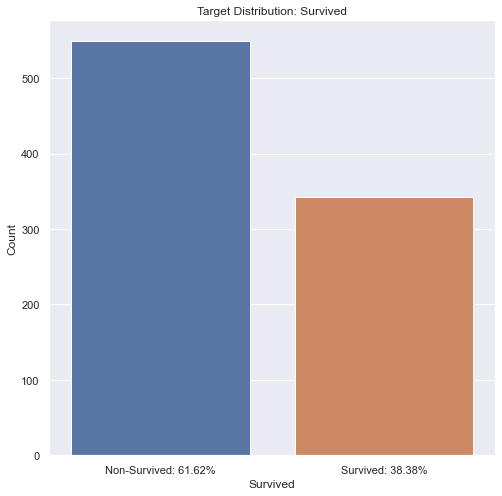

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(df_train['Survived'])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Target Distribution: Survived")
plt.xticks(ticks=(0,1), 
           labels=["Non-Survived: {:.2f}%".format(nsurvived/df_train.shape[0]*100),
                   "Survived: {:.2f}%".format(survived/df_train.shape[0]*100)])
plt.show()

In [29]:
# pd.DataFrame(df_all.groupby(["Deck", df_all["Survived"]==1]).count()["Name"])

## *Coorelations* in features

Features are highly correlated with each other and dependent to each other.

The highest correlation between features is `0.549500` in training set and `0.577147` in test set (between Fare and Pclass). The other features are also highly correlated. There are `9 correlations in training set` and `6 correlations in test set` that are `higher than 0.1.`

In [69]:
# Get list of all correlations
df_corr = df_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0":"Feature 1", "level_1":"Feature 2", 0:"Correlation Coefficient"}, inplace=True)

# Remove all the same-same correlations (1.0)
df_corr.drop(df_corr[df_corr['Correlation Coefficient']==1].index, axis=0, inplace=True)
df_corr = df_corr[df_corr['Correlation Coefficient']>0.1]   # All correlation values greater than 0.1

# Drop duplicate rows
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr

,Feature 1,Feature 2,Correlation Coefficient
7,Pclass,Fare,0.549500
9,Age,Pclass,0.417667
11,SibSp,Parch,0.414838
13,Pclass,Survived,0.338481
15,Survived,Fare,0.257307
17,Age,SibSp,0.249747
19,Parch,Fare,0.216225
21,Parch,Age,0.176733
23,Fare,SibSp,0.159651
25,Age,Fare,0.124061


In [82]:
# Get list of all correlations
df_corr_test = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr_test.rename(columns={"level_0":"Feature 1", "level_1":"Feature 2", 0:"Correlation Coefficient"}, inplace=True)

# Remove all the same-same correlations (1.0)
df_corr_test.drop(df_corr_test[df_corr_test['Correlation Coefficient']==1].index, axis=0, inplace=True)
df_corr_test = df_corr_test[df_corr_test['Correlation Coefficient']>0.1]   # All correlation values greater than 0.1

# Drop duplicate rows
df_corr_test.drop(df_corr_test.iloc[1::2].index, inplace=True)
df_corr_test

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577489
8,Age,Pclass,0.526789
10,Age,Fare,0.345347
12,SibSp,Parch,0.306895
14,Parch,Fare,0.230410
16,Fare,SibSp,0.172032


In [84]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


## *Heatmaps for correlations (Training & Test Sets)*

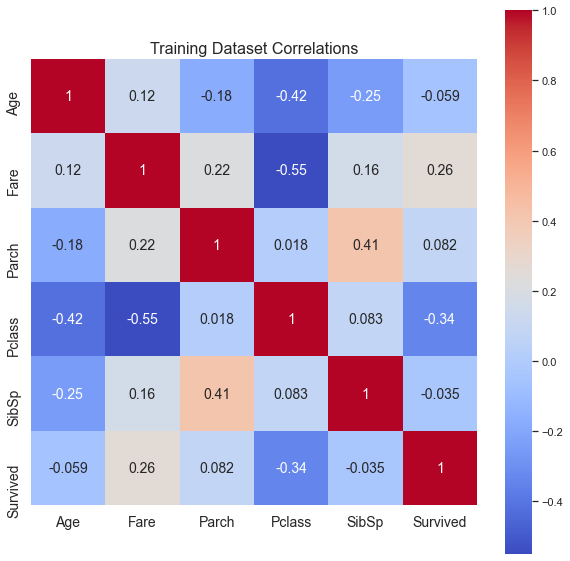

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(),
            annot=True,
            square=True,
            annot_kws={'size':14},
            cmap='coolwarm')
plt.title("Training Dataset Correlations", size = 16)
plt.xticks(size= 14)
plt.yticks(size=14)
plt.show()

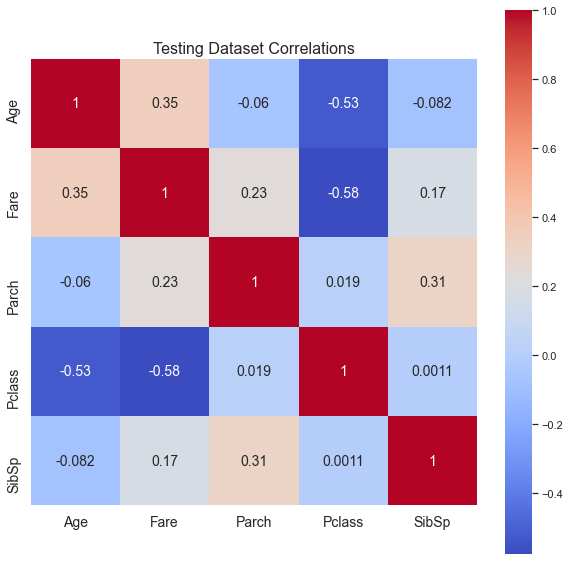

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(),
            annot=True,
            square=True,
            annot_kws={'size':14},
            cmap='coolwarm')
plt.title("Testing Dataset Correlations", size = 16)
plt.xticks(size= 14)
plt.yticks(size=14)
plt.show()